In [26]:
import os

import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np

In [22]:
STATIONS_PATH = os.path.join(os.getcwd(), "stations.json")
MARGIN = 0.01

In [6]:
stations = pd.read_json(STATIONS_PATH)
stations.set_index("id", inplace=True)
stations["x"] = stations["position"].apply(lambda x: x[0])
stations["y"] = stations["position"].apply(lambda x: x[1])
display(stations)

,address,total,free,available,open,position,x,y
id,,,,,,,,
35c8824441ca06c3010e12a6579ae832f3ccf698,Peris y Valero - Luis Santángel,20,19,1,True,"[39.460937800028375, -0.366440625001755]",39.460938,-0.366441
49022eaf35990b347e1a0e0f81142008c11ce276,Peris y Valero - Salamanca,20,5,15,True,"[39.462934287947085, -0.361795346004996]",39.462934,-0.361795
3e3958e74b680d4e509abc7478735791ccab14d9,Jerónimo Monsoriu - Alcalde Cano Coloma,20,12,8,True,"[39.464669282422186, -0.337117260314212]",39.464669,-0.337117
36bf23a539d4c3e8b546be9aeef57d479bbe149c,Ausias March - Pianista Amparo Iturbi,21,12,9,True,"[39.455432269344854, -0.37496539716978305]",39.455432,-0.374965
ccc50d4f4c17af800fab6eec37509f7bedd71408,Av. Puerto 61-63,20,9,11,True,"[39.46651829706714, -0.354195317249592]",39.466518,-0.354195
...,...,...,...,...,...,...,...,...
c469c7925be3e673d001b12bbe4b639766803fb2,Periodista Gil Sumbiela - Poeta Serrano Clavero,15,13,2,True,"[39.49271239990425, -0.389007415242801]",39.492712,-0.389007
dd9b3090ae2e9535189b817150ee12e964ff111e,Plaza del Musico López Chavarri,20,18,2,True,"[39.4768353435743, -0.380288397642485]",39.476835,-0.380288
965c1d4b2aee95b895be139a83ca2d93226d1cbc,Plaza de la Virgen - Bailía,25,23,2,True,"[39.476747340831494, -0.37534238089458904]",39.476747,-0.375342


In [7]:
positions = stations[['x', 'y']]
display(positions)

,x,y
id,,
35c8824441ca06c3010e12a6579ae832f3ccf698,39.460938,-0.366441
49022eaf35990b347e1a0e0f81142008c11ce276,39.462934,-0.361795
3e3958e74b680d4e509abc7478735791ccab14d9,39.464669,-0.337117
36bf23a539d4c3e8b546be9aeef57d479bbe149c,39.455432,-0.374965
ccc50d4f4c17af800fab6eec37509f7bedd71408,39.466518,-0.354195
...,...,...
c469c7925be3e673d001b12bbe4b639766803fb2,39.492712,-0.389007
dd9b3090ae2e9535189b817150ee12e964ff111e,39.476835,-0.380288
965c1d4b2aee95b895be139a83ca2d93226d1cbc,39.476747,-0.375342


In [23]:
X_min = positions['x'].min() - MARGIN
X_max = positions['x'].max() + MARGIN
Y_min = positions['y'].min() - MARGIN
Y_max = positions['y'].max() + MARGIN

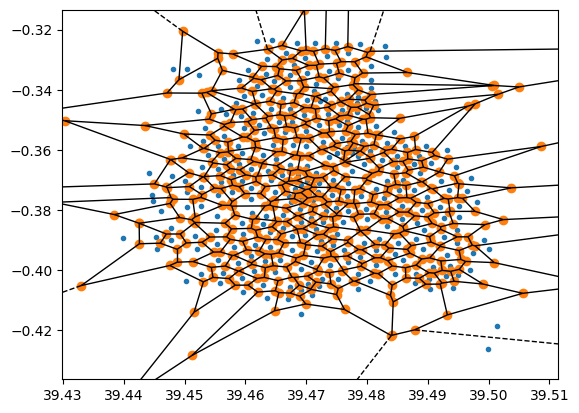

In [38]:
voronoi = Voronoi(positions)
voronoi_plot_2d(voronoi)
plt.xlim(X_min, X_max)
plt.ylim(Y_min, Y_max)
plt.show()

In [58]:
bounding_points_distance = 0.01

bounding_points_left = np.linspace(Y_min, Y_max, int((Y_max - Y_min) / bounding_points_distance))
bounding_points_left = np.array([[X_min, y] for y in bounding_points_left])

bounding_points_right = np.linspace(Y_min, Y_max, int((Y_max - Y_min) / bounding_points_distance))
bounding_points_right = np.array([[X_max, y] for y in bounding_points_right])

bounding_points_top = np.linspace(X_min, X_max, int((X_max - X_min) / bounding_points_distance))
bounding_points_top = np.array([[x, Y_max] for x in bounding_points_top])

bounding_points_bottom = np.linspace(X_min, X_max, int((X_max - X_min) / bounding_points_distance))
bounding_points_bottom = np.array([[x, Y_min] for x in bounding_points_bottom])

# Remove firts and last points
bounding_points_left = bounding_points_left[1:-1]
bounding_points_right = bounding_points_right[1:-1]
bounding_points_top = bounding_points_top[1:-1]
bounding_points_bottom = bounding_points_bottom[1:-1]

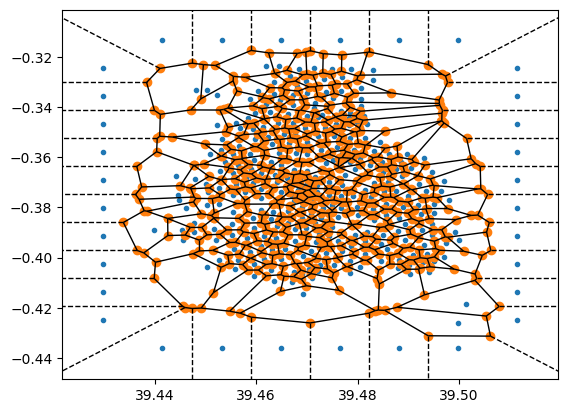

In [59]:
positions_for_voronoi = np.concatenate((positions, bounding_points_left, bounding_points_right, bounding_points_top, bounding_points_bottom))
voronoi = Voronoi(positions_for_voronoi)
voronoi_plot_2d(voronoi)
plt.show()

In [60]:
# Print each voronoi region
for region in voronoi.regions:
    print(region)

[]
[15, -1, 14]
[14, -1, 4]
[5, -1, 0]
[3, 1, -1]
[9, -1, 8]
[32, -1, 30, 29, 31]
[32, -1, 11, 25]
[30, -1, 7]
[23, 21, 20, -1, 22]
[8, -1, 7]
[22, -1, 6]
[20, -1, 2]
[13, 11, -1, 12]
[-1, 1, 6]
[34, 12, -1, 2, 33]
[37, 16, 3, -1, 15, 36]
[41, 17, 5, 0, 40]
[46, 19, 18, 45]
[62, 60, 59, 58, 61]
[61, -1, 58]
[59, 28, -1, 58]
[64, 33, 2, 20, 21, 19, 18, 63]
[75, 23, 22, 6, 1, 3, 16, 47, 73]
[76, 70, 46, 19, 21, 23, 75]
[86, 83, 82, 84, 85]
[84, 24, 29, 30, 7, 8, 9, 82]
[83, 49, -1, 9, 82]
[88, 44, 43, 50, 87]
[94, 92, 91, 90, 93]
[93, 13, 11, 25, 90]
[94, 89, 88, 87, 92]
[94, 89, 35, 34, 12, 13, 93]
[105, 77, 48, 78, 79, 51, 104]
[107, 53, 52, 24, 84, 85, 80, 106]
[112, 98, 96, 56, 111]
[117, 65, 66, 26, 10, 116]
[128, 64, 63, 126]
[128, 64, 33, 34, 35, 127]
[131, 17, 5, -1, 4, 130]
[148, 143, 145, 146, 144, 147]
[150, 73, 75, 76, 74, 149]
[153, 108, 54, 51, 79, 151]
[155, 151, 79, 78, 154]
[157, 152, 153, 151, 155]
[157, 152, 106, 80, 156]
[160, 81, 62, 61, -1, 159]
[162, 60, 62, 81, 16

In [61]:
# Print each voronoi point
for point in voronoi.points:
    print(point)

[39.4609378  -0.36644063]
[39.46293429 -0.36179535]
[39.46466928 -0.33711726]
[39.45543227 -0.3749654 ]
[39.4665183  -0.35419532]
[39.47673433 -0.35896733]
[39.48903338 -0.37989639]
[39.4677213 -0.3506093]
[39.48297334 -0.32533421]
[39.45004425 -0.37050339]
[39.48192037 -0.38965943]
[39.47877936 -0.39548045]
[39.47385534 -0.39832146]
[39.44770325 -0.38602944]
[39.44462123 -0.37515832]
[39.45938429 -0.38428142]
[39.45539327 -0.38190542]
[39.44796024 -0.36881838]
[39.45208227 -0.39301546]
[39.45032925 -0.37886641]
[39.45872629 -0.39775747]
[39.4935454  -0.37348836]
[39.49500441 -0.40154746]
[39.47850636 -0.40613649]
[39.46909033 -0.40650949]
[39.46284031 -0.40496949]
[39.45028827 -0.4035745 ]
[39.46773732 -0.39321445]
[39.47689335 -0.39728246]
[39.46741032 -0.40557349]
[39.49716041 -0.36943735]
[39.49698542 -0.39996445]
[39.4628203  -0.38454242]
[39.46619531 -0.38605243]
[39.47158232 -0.36775136]
[39.47046632 -0.37482438]
[39.46896732 -0.3797244 ]
[39.46819131 -0.37312938]
[39.47503434 -

In [80]:
point_region = {}
for point, region_p in zip(voronoi.points, voronoi.point_region):
    region = voronoi.regions[region_p]

    polygon = []
    if not -1 in region:
        for i in region:
            polygon.append(voronoi.vertices[i])

    point_region[tuple(point)] = polygon

display(point_region)

{(39.460937800028375, -0.366440625001755): [array([39.46169222, -0.36895881]),
  array([39.46005368, -0.36829813]),
  array([39.45907071, -0.36664827]),
  array([39.46135492, -0.36386823]),
  array([39.46267396, -0.36443513]),
  array([39.46277039, -0.3645503 ]),
  array([39.4619476 , -0.36872782])],
 (39.462934287947085, -0.361795346004996): [array([39.46088017, -0.36322769]),
  array([39.46135492, -0.36386823]),
  array([39.46267396, -0.36443513]),
  array([39.46509195, -0.36063003]),
  array([39.46167712, -0.35914213]),
  array([39.46162643, -0.35920924])],
 (39.464669282422186, -0.337117260314212): [array([39.46257632, -0.33667517]),
  array([39.46434517, -0.33967141]),
  array([39.46475364, -0.33983653]),
  array([39.46668004, -0.33708025]),
  array([39.46533416, -0.33527034])],
 (39.455432269344854,
  -0.37496539716978305): [array([39.45266188, -0.37581637]), array([39.45284048, -0.37486861]), array([39.45489814, -0.37271041]), array([39.45596388, -0.372857  ]), array([39.4578148

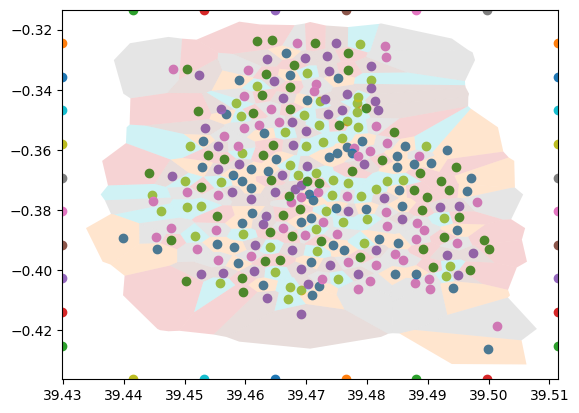

In [81]:
for point, polygon in point_region.items():
    plt.scatter(point[0], point[1])
    plt.fill(*zip(*polygon), alpha=0.2)

plt.xlim(X_min, X_max)
plt.ylim(Y_min, Y_max)

plt.show()

In [87]:
frames = []
for station_id, station in stations.iterrows():
    frames.append(
        {
            "id": station_id,
            "point": (station["x"], station["y"]),
            "region": point_region[(station["x"], station["y"])],
        }
    )

stations_id_regions = pd.DataFrame(frames)
stations_id_regions.set_index("id", inplace=True)

display(stations_id_regions)

,point,region
id,,
35c8824441ca06c3010e12a6579ae832f3ccf698,"(39.460937800028375, -0.366440625001755)","[[39.461692215830006, -0.36895881368740574], [..."
49022eaf35990b347e1a0e0f81142008c11ce276,"(39.462934287947085, -0.361795346004996)","[[39.4608801701741, -0.36322768540537315], [39..."
3e3958e74b680d4e509abc7478735791ccab14d9,"(39.464669282422186, -0.337117260314212)","[[39.46257631768557, -0.3366751707651851], [39..."
36bf23a539d4c3e8b546be9aeef57d479bbe149c,"(39.455432269344854, -0.37496539716978305)","[[39.452661875574016, -0.37581637178089533], [..."
ccc50d4f4c17af800fab6eec37509f7bedd71408,"(39.46651829706714, -0.354195317249592)","[[39.46496707115384, -0.35595921201653974], [3..."
...,...,...
c469c7925be3e673d001b12bbe4b639766803fb2,"(39.49271239990425, -0.389007415242801)","[[39.490306731589435, -0.3888937699640611], [3..."
dd9b3090ae2e9535189b817150ee12e964ff111e,"(39.4768353435743, -0.380288397642485)","[[39.47693495907331, -0.3778128339438881], [39..."
965c1d4b2aee95b895be139a83ca2d93226d1cbc,"(39.476747340831494, -0.37534238089458904)","[[39.47693495907331, -0.3778128339438881], [39..."


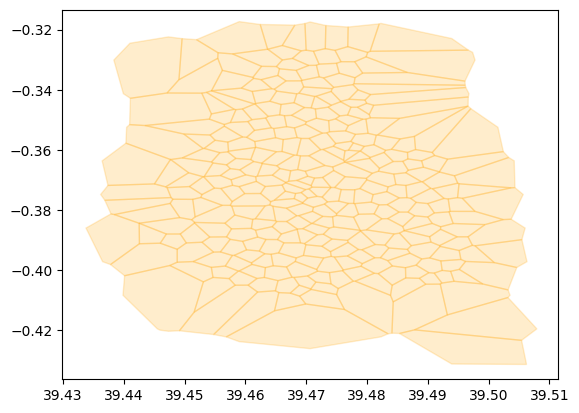

In [88]:
for station_id, station in stations_id_regions.iterrows():
    plt.fill(*zip(*station["region"]), alpha=0.2, color="orange")

plt.xlim(X_min, X_max)
plt.ylim(Y_min, Y_max)
plt.show()

In [91]:
# Save the regions to a json file
stations_id_regions.to_json("valenbci_voronoi.json", orient="index", indent=2)